In [3]:
#【第一题】 天天提高1%
base_add = 1 # 提高的基数
base_dec = 1
for i in range(1,365):
    base_add = base_add + base_add*0.01
    base_dec = base_dec - base_dec*0.01
    
print(base_add)
print(base_dec)
diffence = base_add - base_dec 
print("一年的差值："+ str(diffence))
    

37.409340923650625
0.025775721668980994
一年的差值：37.38356520198165


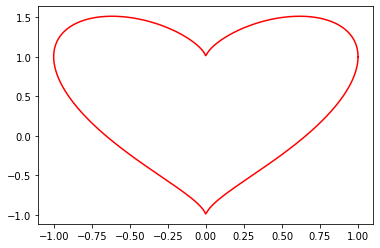

In [12]:
# 【第11题】8. 心脏线绘制。笛卡儿心形线也称为心脏线，它是有一个尖点的外摆线。
# 当一个圆沿着另一个半径相同的圆滚动时，圆上一点的轨迹就是心脏线。
# 请调研笛卡儿心形线，并使用 numpy 和matplotlib 绘制-一条笛卡儿心形线。
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))

data=np.linspace(0,2*np.pi,1000)
x = np.cos(data)
y = np.sin(data)+((np.cos(data))**2)**(1/3)

plt.plot(x,y,'r')
plt.show()



In [19]:
#  【第10题】．搜索关键词自动提交。利用百度搜索提供的链接接口，
# 通过requests的get（）函数提交查询，响应结果为百度搜索结果。
import requests
from bs4 import BeautifulSoup
import re
import json
def getKeywordResult(keyword):
    url = 'http://www.baidu.com/s?wd='+keyword
    try:
        r = requests.get(url, timeout=30)
        r.raise_for_status()
        r.encoding = 'utf-8'
        return r.text
    except:
        return ""
def parserLinks(html):
    soup = BeautifulSoup(html, "html.parser")
    links = []
    for div in soup.find_all('div', {'data-tools': re.compile('title')}):
        data = div.attrs['data-tools']  #获得属性值
        data = data.replace("'","\"")
        d = json.loads(data)        #将属性值转换成字典
        links.append(d['title'])    #将返回链接的题目返回
    return links
def main():
    html = getKeywordResult('广东工业大学华立学院陈涛获奖记录')
    ls = parserLinks(html)
    count = 1
    for i in ls:
        print("[{:^3}]{}".format(count, i))
        count += 1
main()


[ 1 ]关于公布和核对第六届“挑战杯”广东工业大学华立学院大学生课外...
[ 2 ]广东工业大学华立学院:智能搬运机器人搬回广东省一等奖!
[ 3 ]广东工业大学华立学院:历史性突破!A类赛全国一等奖
[ 4 ]你好!有你的快递,2018精英联赛获奖证书/奖杯寄出啦!「赛事播报...
[ 5 ]“创青春”广东大学生创业大赛获奖名单-百度文库
[ 6 ]附件:2015年广东省高校微课教学比赛获奖名单
[ 7 ]关于我校第六届“挑战杯”广东工业大学华立学院大学生课外学术...
[ 8 ]破纪录!校运会精彩回顾!_广东工业大学华立学院_零二七艺考
[ 9 ]第十三届学院奖秋季赛缇•嘉花草茶命题获奖名单-广州华商学院...


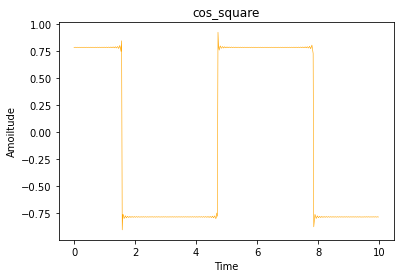

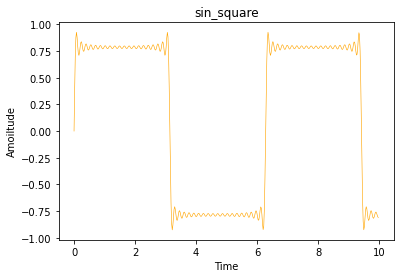

In [34]:
from numpy import mgrid,sin,cos,array,pi
from matplotlib.pyplot import plot ,show,title,legend,xlabel,ylabel
x = mgrid[0:10:0.02]

def sin_square():
    y1 = 0
    for i in range(0,20,1):
        b = sin((2*i+1)*x)/(2*i+1)
        y1 = b + y1
    plot(x,y1,'orange',linewidth = 0.6)
    title('sin_square')
    xlabel('Time')
    ylabel('Time')
    ylabel('Amoiltude')
    show()
    
# 将sin转换成cos 写法：
def cos_square():
    y1 = 0;
    for i in range(0,200,1):
        b = (-1)**(i)*cos((2*i+1)*x)/(2*i+1)
        y1 = b + y1
    plot(x,y1,'orange',linewidth = 0.6)
    title('cos_square')
    xlabel('Time')
    ylabel('Time')
    ylabel('Amoiltude')
    show()
    
cos_square()
sin_square()

In [18]:
# 9．中国大学排名爬虫。大学排名爬虫的构建需要3个步骤：第一，采用requests库从网络上获取网页内容；
#第二，使用beautifulsoup4库分析网页内容并提取有用的数据到恰当的数据结构中；第三，利用数据结构展示或进一步处理数据。
#CrawUnivRankingA.py

import requests
import bs4
import time
import random
import pandas as pd

ulist = []
url = 'https://www.shanghairanking.cn/rankings/bcur/202011'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36'}

response = requests.get(url=url, headers=headers)
response.encoding = "utf-8"  # 转化字符码
html = response.text

soup = bs4.BeautifulSoup(html, 'html.parser')

for tr in soup.find('tbody').children:
    if isinstance(tr, bs4.element.Tag):
        tds = tr.find_all('td')  # 等价于 tds = tr('td')
        name = tds[1].text
        print(name)
        score = tds[4].text
        print(score)
        pd1 = pd.DataFrame({'学校': name, '总分': score}, index=[0])
        ulist.append(pd1)

second = random.randrange(3, 5)
time.sleep(second)

university2 = pd.concat(ulist[0:10])
university2.to_excel('university.xlsx', index=False)
print(university2)

 清华大学    Tsinghua University   双一流/985/211   

                        852.5
                    
 北京大学    Peking University   双一流/985/211   

                        746.7
                    
 浙江大学    Zhejiang University   双一流/985/211   

                        649.2
                    
 上海交通大学    Shanghai Jiao Tong University   双一流/985/211   

                        625.9
                    
 南京大学    Nanjing University   双一流/985/211   

                        566.1
                    
 复旦大学    Fudan University   双一流/985/211   

                        556.7
                    
 中国科学技术大学    University of Science and Technology of China   双一流/985/211   

                        526.4
                    
 华中科技大学    Huazhong University of Science and Technology   双一流/985/211   

                        497.7
                    
 武汉大学    Wuhan University   双一流/985/211   

                        488.0
                    
 中山大学    Sun Yat-Sen University   双一流/985/211   

       

ModuleNotFoundError: No module named 'openpyxl'